In [1]:
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt

# 1. Fundamentals

## Statistical Inference (GHV Chapter 4)

### Sampling distributions (GHV &sect; 4.1)

**Example:** Sampling distributions of $\bar{x}$ and $s^2$.

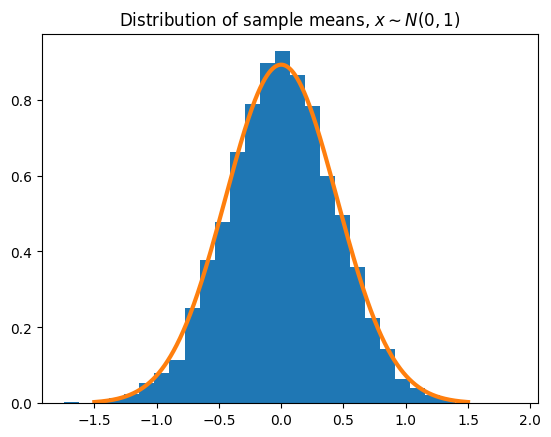

In [15]:
d = stats.norm()  # N(0, 1)
m = 10_000
n = 5
x = d.rvs(size=(m, n))
xbar = x.mean(axis=1)
plt.hist(xbar, bins=30, density=True)
plt.title("Distribution of sample means, $x\\sim N(0, 1)$")
xs = np.linspace(-1.5, 1.5, 1000)
plt.plot(xs, stats.norm(0, 1 / np.sqrt(n)).pdf(xs), lw=3)
plt.show()

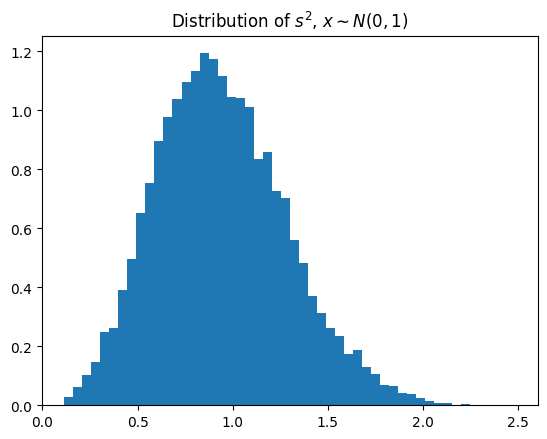

In [25]:
s2 = x.std(axis=1, ddof=1)
plt.hist(s2, bins=50, density=True)
plt.title("Distribution of $s^2$, $x\\sim N(0, 1)$")
t = np.linspace(0, 2.5, 1000)

### Standard error

- **standard error** means "standard deviation" or "estimate of standard deviation"

- $\displaystyle\operatorname{se}(\bar{x}) = \frac{\operatorname{se}(x)}{\sqrt{n}}$

### Bionomial proportion

- $y\sim \operatorname{Bin}(n, p)$

- $\displaystyle\hat{p}=\frac{y}{n}$

- $\displaystyle\operatorname{se}(\hat{p})=\sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}$

**Example:** In a survey of university students, 57 out of 146 of male respondents say they regularly tweeze their eyebrows.

Use a binomial model to estimate the proportion $p$ of male student eyebrow tweezers, and its standard error.

In [26]:
n = 146
y = 57
phat = y / n
sephat = np.sqrt(phat * (1 - phat) / n)
print(f"phat = {phat:.2f}\nsephat = {sephat:.2f}")

phat = 0.39
sephat = 0.04


### The Central Limit Theorem (CLT)

$$
\text{distribution of $\bar{x}$}\approx
N(\mu, \sigma^2/n)
$$

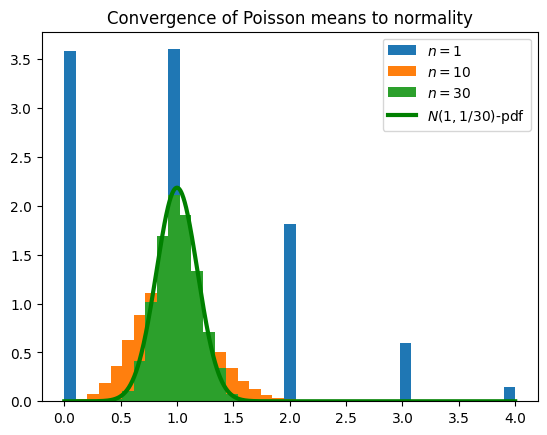

1.0 1.0


In [39]:
d = stats.poisson(1)
ns = [1, 10, 30]
m = 100_000
for n in ns:
    x = d.rvs(size=(m, n))
    xbar = x.mean(axis=1)
    bins = np.linspace(0, 4, 40)
    plt.hist(xbar, bins=bins, density=True, label=f"$n={n}$")

t = np.linspace(0, 4, 1000)
norm = stats.norm(1, 1 / np.sqrt(30))
plt.plot(t, norm.pdf(t), color="green", lw=3, label="$N(1, 1/30)$-pdf")
plt.legend()
plt.title("Convergence of Poisson means to normality")
plt.show()
print(d.mean(), d.var())

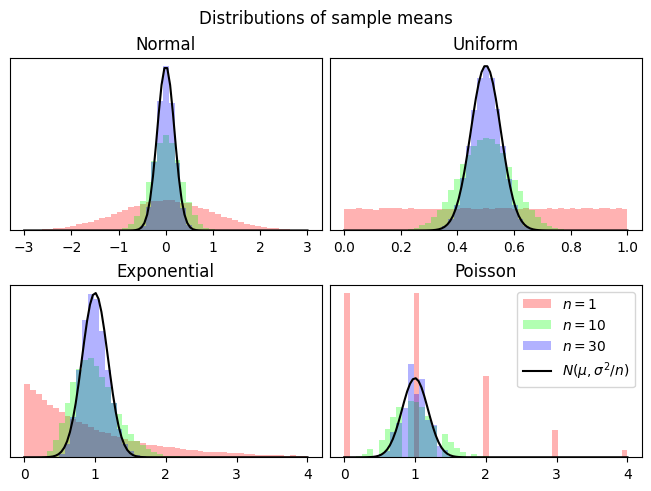

In [40]:
m = 100_000
fig, axes = plt.subplots(nrows=2, ncols=2, layout="constrained")
axes = axes.ravel()
plt.suptitle("Distributions of sample means")

ns = [1, 10, 30]
ds = [stats.norm(), stats.uniform(), stats.expon(), stats.poisson(1)]
cs = [(1, 0, 0, 0.3), (0, 1, 0, 0.3), (0, 0, 1, 0.3)]
lows = [-3, 0, 0, 0]
highs = [3, 1, 4, 4]
titles = ["Normal", "Uniform", "Exponential", "Poisson"]

for ax, d, low, high, title in zip(axes, ds, lows, highs, titles):
    bins = np.linspace(low, high, 50)
    for n, c in zip(ns, cs):
        x = d.rvs(size=(m, n))
        xbar = x.mean(axis=1)
        ax.hist(xbar, bins=bins, label=f"$n={n}$", color=c, density=True)
        ax.set_yticks([])
        ax.set_title(title)
    xbars = np.linspace(low, high, 100)
    norm = stats.norm(d.mean(), d.std() / np.sqrt(n))
    ax.plot(xbars, norm.pdf(xbars), "k", label="$N(\\mu, \\sigma^2/n)$")


axes[-1].legend()
plt.show()

### Confidence intervals for the mean

$$
\text{$100(1-\alpha)$\%-CI} =
        [\bar{x} \pm z_{\alpha/2}\operatorname{se}(\bar{x})]
$$

**Example:**
Give the $95$\%-CI for the proportion of male student eyebrow tweezers.

In [44]:
n = 146
y = 57
phat = y / n
sephat = np.sqrt(phat * (1 - phat) / n)
z95 = stats.norm().ppf(1 - 0.05 / 2)
print(f"95%-CI = [{phat:.2f} ± {z95*sephat:.2f}]")

95%-CI = [0.39 ± 0.08]


### Combining means and proportions

$$
\operatorname{se}(x\pm y) = \sqrt{\operatorname{se}(x)^2 + \operatorname{se}(y)^2}\qquad (\text{$x$, $y$ indep.})
$$

**Example:**
In a survey of voting intentions, 57\% of 400 men 45\% of 600 women
say they plan to vote for the Republican candidate in an upcoming election. Estimate the **gender gap**,
its standard error, and its 99.9%-confidence interval.


### A goodness of fit test (cf. GHV &sect;4.6)

**Example:** The 1000 votes in an election with two candidates, A and B, are tallied $m=10$ batches of $n=100$. The counters report the following batch tallies $y_i$, $i < 10$, for candidate A:
$$
61,\, 64,\, 54,\, 61,\, 59,\, 58,\, 65,\, 62,\, 61,\, 59
$$
Candidate B protests, suggesting these results exhibit implausible uniformity.
Does he have a case?
Analyze using the **test statistic**
$$
T = \left(\frac1{\bar{y}} + \frac1{n - \bar{y}}\right)\sum_{i<m} (y_i - \bar{y})^2.
$$

## Simulation (GHV Chapter 5)